In [123]:
# import sys
# !{sys.executable} -m pip install sympy
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install matplotlib

  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl


In [124]:
import sympy as sym
import numpy as np
from sympy import lambdify
from numpy import linalg as LA
import matplotlib.pyplot as plt

#sym.init_printing(use_unicode=False, wrap_line=True)

### PS3  linearized solution of a Ramsey model

In [82]:
#VARIABLES

beta = 0.9
#discount factor

theta = 1.0/beta - 1.0
#discount rate

sigma = 2.0
#utility curvature

alpha = 1/2
#exponent on capital

delta = 1
#depreciation rate

T = 50
#number of time periods to simulate

In [83]:
#utility function of ct
ct = sym.symbols('ct')
uct = (ct ** (1 - sigma) - 1 ) / (1 - sigma)
duct = sym.diff(uct)
dduct = sym.diff(duct)


In [84]:
#ct
uct = lambdify(ct, uct)
duct = lambdify(ct, duct)
dduct = lambdify(ct, dduct)

In [85]:
#STEADYSTATE

Kss = ( (1-beta+delta*beta) / (alpha*beta) )**(1/(alpha-1))
Css = Kss**alpha - delta*Kss
A = np.zeros([2,2])
coef = (duct(Css)*(alpha**2 - alpha)*(Kss)**(alpha - 2))/dduct(Css)
A[0, 0] = 1 + coef/(1 + theta)
A[0, 1] = -coef
A[1, 0] = -1
A[1, 1] = 1 + theta
D, V = LA.eig(A)

In [171]:
#CHOOSE STABLE EIGENVALUE & VERIFY
print(A.dot(V[:,D<1]) ==  V[:,D<1]* D[D<1])
determinant = (V[0,D<1] / V[1,D<1]).item()
lamda = D.item(np.where(D<1)[0][0])
determinant

[[ True]
 [ True]]


0.49350473105935383

In [172]:
r = 30
k = -Kss * lamda
addk = abs(2 * Kss / r) 
deltak = []
deltac = []
for i in range(r): 
    k += addk
    deltak.append(k)
    deltac.append(determinant * k)

Text(0, 0.5, 'consumption')

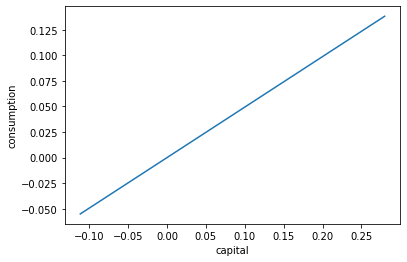

In [173]:
#linear approximation
plt.plot(deltak , deltac)
plt.xlabel('capital')
plt.ylabel('consumption')

In [195]:
#Simulating dynamics 
kpercent = 0.1
deltak = (kpercent - 1) * Kss 
deltac = determinant * deltak 
kplot = []
cplot = []

for i in range(T):
    kplot.append(deltak)
    cplot.append(deltac)
    
    deltak = A[1, :].dot([deltac, deltak])
    deltac = determinant * deltak


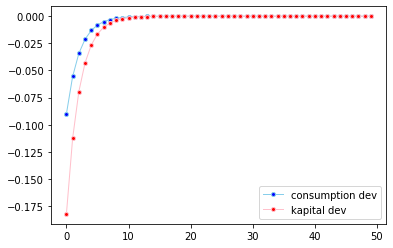

In [206]:
plt.plot(list(range(0, T)), cplot, marker='o', markerfacecolor='blue', markersize=4, color='skyblue', linewidth=1, label='consumption dev')
plt.plot(list(range(0, T)), kplot, marker='o', markerfacecolor='red', markersize=4, color='pink', linewidth=1, label='kapital dev')
plt.legend()
plt.show()

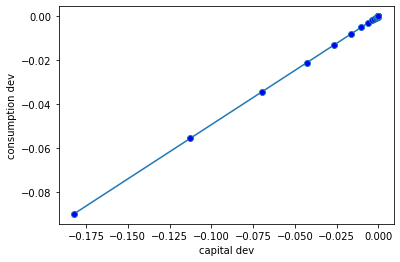

In [209]:
plt.plot(kplot , cplot, marker='o', markerfacecolor='blue')
plt.xlabel('capital dev')
plt.ylabel('consumption dev')
plt.show()